**Homework-8 Part A (Using 20 centers)**

In [0]:
import numpy as np
import random
from copy import deepcopy
import matplotlib.pyplot as plt
from math import exp

In [0]:
# Drawing the 100 samples randomly to create the data points.

n_samples = 100
x = np.random.uniform(0,1,(n_samples ,2))
d = []
c1 = []
c2 = []
for i in range(n_samples):
    if x[i][1] < (0.2 * np.sin(10*x[i][0])) + 0.3:
        d.append(1)
        c1.append(x[i])
    elif (x[i][1] - 0.8)**2 + (x[i][0] - 0.5)**2 < 0.15**2:
        d.append(1)
        c1.append(x[i])
    else:
        d.append(-1)
        c2.append(x[i])

In [0]:
# creating the Number of centers and assigning them to particular classes

m = 4 # m = 4                     # For the first question selecting the 20 number of centers.

m_c1 = random.sample(range(len(c1)), k = int(m/2))         # 10 centers are assigned to class 1
m_c2 = random.sample(range(len(c2)), k = int(m/2))         # 10 centers are assigned to class -1

centers_c1 = []
centers_c2 = []

for i in range(len(m_c1)):
    centers_c1.append(c1[i])

for i in range(len(m_c2)):
    centers_c2.append(c2[i])
centers = centers_c1 + centers_c2

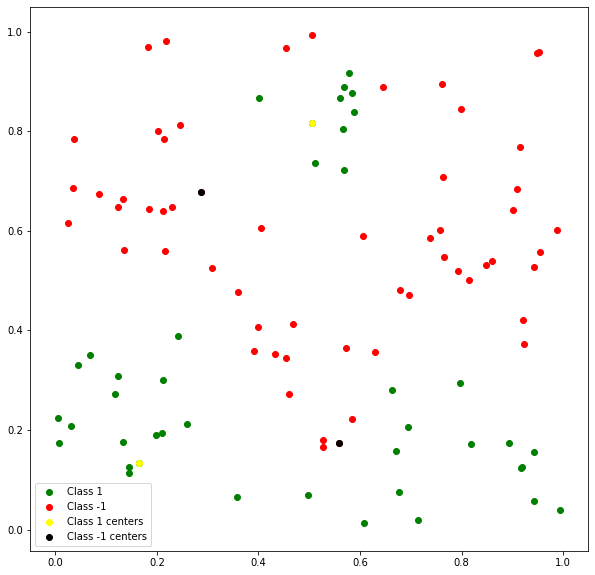

In [37]:
# Plot for the assigned centers and their respective classes

fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(*zip(*c1), c = 'green', label = 'Class 1')
plt.scatter(*zip(*c2), c = 'red', label = 'Class -1')
plt.scatter(*zip(*centers_c1), c='yellow', label = 'Class 1 centers')
plt.scatter(*zip(*centers_c2), c='black', label = 'Class -1 centers')
plt.legend(loc = 'best')
plt.show()


In [0]:
c1 = np.asarray(c1)
c2 = np.asarray(c2)

centers_c1 = np.asarray(centers_c1)
centers_c2 = np.asarray(centers_c2)

k= int(m/2)

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

def k_means(old_centers, centers, c):
    clusters = np.zeros(len(c))
    error = dist(centers, old_centers, None)

    while error != 0:
        for i in range(len(c)):
            distances = dist(c[i], centers)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        old_centers = deepcopy(centers)
        for i in range(k):
            points = [c[j] for j in range(len(c)) if clusters[j] == i]
            centers[i] = np.mean(points, axis=0)
        error = dist(centers, old_centers, None)
    return centers

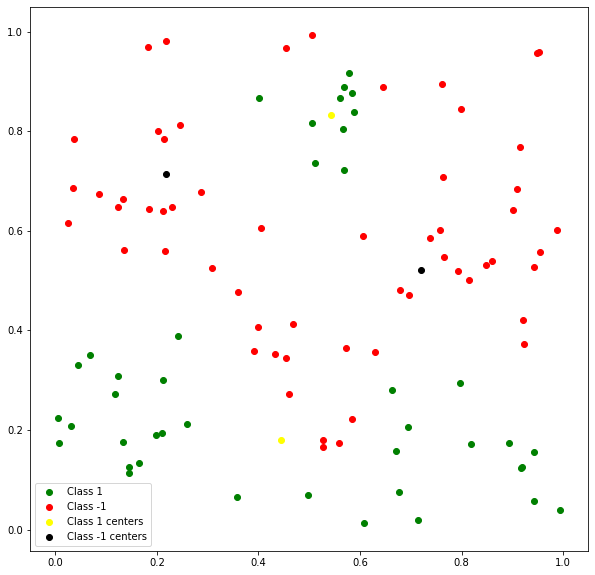

In [39]:
centers_c1_old = np.zeros(centers_c1.shape)
updated_centers_c1 = k_means(centers_c1_old, centers_c1, c1)

centers_c2_old = np.zeros(centers_c2.shape)
updated_centers_c2 = k_means(centers_c2_old, centers_c2, c2)

fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(*zip(*c1), c = 'green', label = 'Class 1')
plt.scatter(*zip(*c2), c = 'red', label = 'Class -1')
plt.scatter(*zip(*updated_centers_c1), c='yellow', label = 'Class 1 centers')
plt.scatter(*zip(*updated_centers_c2), c='black', label = 'Class -1 centers')
plt.legend(loc = 'best')
plt.show()

In [0]:
updated_centers = np.concatenate((updated_centers_c1, updated_centers_c2))

w = np.random.uniform(-1, 1, size=m)
bias = np.random.uniform(-1, 1)
learning_rate = 0.1

new_x = []
for i in range(len(x)):
    temp = []
    for j in range(len(updated_centers)):
        temp.append(dist(x[i], updated_centers[j], None))
    new_x.append(temp)

In [41]:
def sgn_act_fun(x):
    if x >= 0:
        y = 1
    else:
        y = -1
    return y

def misclassified(w, bias, x, d):
    misclassifications = 0
    for i in range(len(x)):
        y = np.dot(w.reshape(1,m),np.asarray(x[i]).reshape(m,1)) + bias
        y = sgn_act_fun(y)
        if y != d[i]:   
            misclassifications = misclassifications +1
    return misclassifications
error = misclassified(w, bias, new_x, d)

while error > 15:
    for i in range(len(new_x)):
        y = np.dot(w.reshape(1,m),np.asarray(new_x[i]).reshape(m,1)) + bias
        y = sgn_act_fun(y)
        if y != d[i]:
            update = np.asarray(new_x[i])*learning_rate*(d[i]-y)
            w = np.add(w, update)
    error = misclassified(w, bias, new_x, d)

KeyboardInterrupt: ignored

In [0]:
def rbf(x):
    ans = []
    for i in range(len(x)):
       ans.append(exp(- x[i]**2)) 
    return ans

def boundry(x, bias, w):
    temp = 0
    for i in range(m):
        temp += w[i]*x[i]
    return temp + bias


In [0]:
x_coord = np.linspace(0.0, 1.0, num=1000)
y_coord = np.linspace(0.0, 1.0, num=1000)
h = []

for i in x_coord:
    for j in y_coord:
        coord = [i, j]
        new_coord = []
        for k in range(m):
            converted_coord = dist(coord, updated_centers[k], None)
            new_coord.append(converted_coord)
        g = boundry(new_coord, bias, w)
        if -0.001 < g < 0.001:
            h.append(coord)

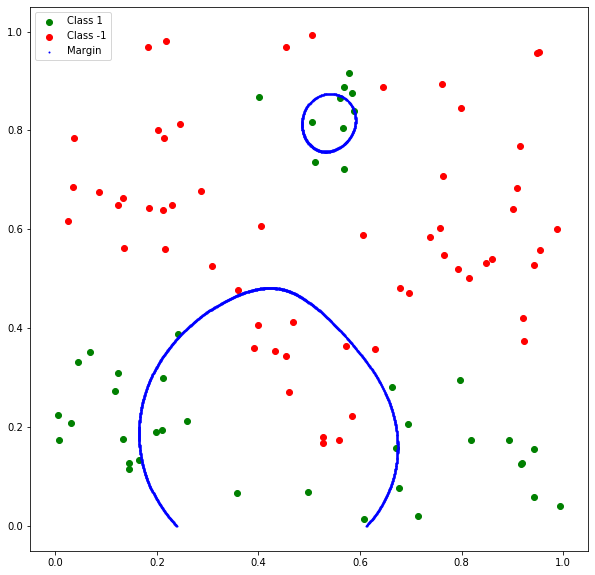

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(*zip(*c1), c = 'green', label = 'Class 1')
plt.scatter(*zip(*c2), c = 'red', label = 'Class -1')
plt.scatter(*zip(*h), c = 'blue',s=1, label = 'Margin')
plt.legend(loc = 'best')
plt.show()